<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/SVD_Equipo49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

* Gerardo Aaron Castañeda Jaramillo - A01137646
* Dalina Aidee Villa Ocelotl - A01793258
* Yocelin Juárez Arroyo - A00819828
* Victor Hugo Avila Felipe - A01794425


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd

import requests
import zipfile as zf
from io import BytesIO

from sklearn.decomposition import TruncatedSVD
import heapq

import matplotlib.pyplot as plt

#**Ejercicio-1.** 

Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega sus primeros 10 renglones. 


In [ ]:
def zip_to_df(url, filename, separator):

  print('Downloading started')
  # Split URL to get the file name
  req = requests.get(url)

  foldername = url.split('/')[-1].split('.')[-2]
  print('Downloading Completed') 

  # extracting the zip file contents
  zipfile= zf.ZipFile(BytesIO(req.content))
  zipfile.extractall('/content/sample_data/' + foldername)
  df = pd.read_csv("/content/sample_data/" + foldername + '/' + filename,sep=separator,encoding='latin-1')

  return df

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip'

In [ ]:
data_rating = zip_to_df(url,'rating_final.csv',',')

In [ ]:
usuario_rating = data_rating[['userID', 'placeID', 'rating']]  # seleccionemos las columnas con las que trabajaremos.
usuario_rating.head(3)

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2


In [ ]:
data_geoplaces2 = zip_to_df(url,'geoplaces2.csv',',')

In [ ]:
nombres_restaurantes = data_geoplaces2[['placeID', 'name']]
nombres_restaurantes.head(3)

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco


In [ ]:
tabla_relacional = pd.merge(usuario_rating, nombres_restaurantes, on='placeID')
tabla_relacional.head()

,userID,placeID,rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo


In [ ]:
UtMx = tabla_relacional.pivot_table(values='rating', index='userID', columns='name', fill_value=0)
UtMx.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
UtMx.shape

(138, 129)

In [ ]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


#**Ejercicio-2.**

Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [ ]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean los restaurantes y las columnas los usuarios.
X.shape

(129, 138)

Factorización SVD utilizando todos los componentes posibles:

In [ ]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

TruncatedSVD(n_components=137, random_state=1)

Cantidad de valores singulares:

In [ ]:
len(SVD.singular_values_)

129

#**Ejercicio-3.**

Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [ ]:
num_sv = 137

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

In [ ]:
# Obtengamos la matriz de correlación de Pearson
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
# Veamos dónde quedó el índice del restaurante Subway en la matriz de utilidad:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

In [ ]:
corr_recomienda = corrMx[id_megusta]
print(corr_recomienda.shape)

(129,)


In [ ]:
corr_recomienda[id_megusta]

1.0

In [ ]:
top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

In [ ]:
indx_top = list()
for rest in top:
  indx_top.append(names_list.index(rest))

In [ ]:
top10 = heapq.nlargest(10,corr_recomienda[indx_top])

In [ ]:
top10names = list()
for val in top10:
  top10names.append(names[corr_recomienda == val][0])

Desplegamos también el valor numérico de la correlación de Pearson de cada una de las 10 recomendaciones:

In [ ]:
top10_restaurantes = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 
top10_restaurantes

,Correlation
Restaurant Teely,0.609521
Vips,0.506278
Rincon del Bife,0.429824
Restaurant and Bar and Clothesline Carlos N Charlies,0.425467
Sanborns Casa Piedra,0.417219
Mariscos Tia Licha,0.388178
Chilis Cuernavaca,0.301090
Mikasa,0.301002
Restaurant los Pinos,0.285149
Log Yin,0.234634


#**Ejercicio-4.**

Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

Iteramos hasta obtener 9 de 10 recomendaciones:

In [ ]:
for num_sv in range(3,137):
  SVD = TruncatedSVD(n_components=num_sv, random_state=1)
  resultant_matrix = SVD.fit_transform(X)
  resultant_matrix.shape
  
  corrMx = np.corrcoef(resultant_matrix, )
  me_gusta = "Subway"

  names = UtMx.columns
  names_list = list(names)
  id_megusta = names_list.index(me_gusta)
  corr_recomienda = corrMx[id_megusta]

  top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

  indx_top = list()
  for rest in top:
    indx_top.append(names_list.index(rest))

  top10 = heapq.nlargest(10,corr_recomienda[indx_top])

  top10names = list()
  for val in top10:
    top10names.append(names[corr_recomienda == val][0])

  
  top10_restaurantes2 = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 

  check_list = list()
  for indx in top10_restaurantes.index:
    if indx in top10_restaurantes2.index:
      check_list.append(True)
  if len(check_list) >= 9:   #aqui evaluamos que sean 9 de 10
    print('Singular Values:',len(SVD.singular_values_))
    print(top10_restaurantes2)
    break

Singular Values: 5
                                                    Correlation
Rincon del Bife                                        1.000000
Restaurant Teely                                       1.000000
Paniroles                                              1.000000
Mariscos Tia Licha                                     1.000000
Chilis Cuernavaca                                      1.000000
Restaurant and Bar and Clothesline Carlos N Cha...     0.999999
Mikasa                                                 0.999999
Vips                                                   0.999999
Log Yin                                                0.999998
Sanborns Casa Piedra                                   0.999995


Donde se obtuvieron 5 valores singulares, y la cantidad de informacion que contienen:

In [ ]:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

percentage = (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()

ranking_list = list(); sv_list = list(); percentage_list = list()
ranking_list.append('rating'); sv_list.append(num_sv); percentage_list.append(percentage)

print('Cantidad de información que se tiene con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (percentage)))

Cantidad de información que se tiene con los primeros 5 vectores singulares:
14.5%


#**Ejercicio-5.**

Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones. 


Obtenemos los primeros 10 incluyendo todos los valores singulares:

In [ ]:
num_sv = 137
SVD = TruncatedSVD(n_components=num_sv, random_state=1)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape
  
corrMx = np.corrcoef(resultant_matrix, )
me_gusta = "tacos de barbacoa enfrente del Tec"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)
corr_recomienda = corrMx[id_megusta]

top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

indx_top = list()
for rest in top:
  indx_top.append(names_list.index(rest))

top10 = heapq.nlargest(10,corr_recomienda[indx_top])

top10names = list()
for val in top10:
  top10names.append(names[corr_recomienda == val][0])

  
top10_restaurantes = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 
print('Singular Values:',len(SVD.singular_values_))
print(top10_restaurantes)


Singular Values: 129
                                       Correlation
vips                                      0.817189
tacos abi                                 0.665305
little pizza Emilio Portes Gil            0.653849
Taqueria EL amigo                         0.437184
puesto de gorditas                        0.412765
Carreton de Flautas y Migadas             0.407795
Little Cesarz                             0.258479
palomo tec                                0.195174
Hamburguesas La perica                    0.191120
carnitas mata calle Emilio Portes Gil     0.170939


Iteramos hasta obtener 9 de 10 recomendaciones:

In [ ]:
for num_sv in range(3,137):
  SVD = TruncatedSVD(n_components=num_sv, random_state=1)
  resultant_matrix = SVD.fit_transform(X)
  resultant_matrix.shape
  
  corrMx = np.corrcoef(resultant_matrix, )
  me_gusta = "tacos de barbacoa enfrente del Tec"

  names = UtMx.columns
  names_list = list(names)
  id_megusta = names_list.index(me_gusta)
  corr_recomienda = corrMx[id_megusta]

  top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

  indx_top = list()
  for rest in top:
    indx_top.append(names_list.index(rest))

  top10 = heapq.nlargest(10,corr_recomienda[indx_top])

  top10names = list()
  for val in top10:
    top10names.append(names[corr_recomienda == val][0])

  
  top10_restaurantes2 = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 

  check_list = list()
  for indx in top10_restaurantes.index:
    if indx in top10_restaurantes2.index:
      check_list.append(True)
  if len(check_list) >= 9:
    print('Singular Values:',len(SVD.singular_values_))
    print(top10_restaurantes2)
    break

Singular Values: 14
                                Correlation
tacos abi                          0.999999
Taqueria EL amigo                  0.999998
vips                               0.999992
carnitas_mata                      0.999991
palomo tec                         0.999990
little pizza Emilio Portes Gil     0.999990
puesto de gorditas                 0.999985
Hamburguesas La perica             0.999980
Carreton de Flautas y Migadas      0.999980
Little Cesarz                      0.999976


Donde se obtuvieron 14 valores singulares, y la cantidad de información que contienen:

In [ ]:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

percentage = (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()

print('Cantidad de información que se tiene con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (percentage)))

Cantidad de información que se tiene con los primeros 14 vectores singulares:
31.3%


#**Ejercicio-6.**

Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada a la comida (food_rating). Incluye tus conclusiones. 


### Ejercicio 1

In [ ]:
usuario_rating = data_rating[['userID', 'placeID', 'food_rating']]  # seleccionemos las columnas con las que trabajaremos.
usuario_rating.head(3)

,userID,placeID,food_rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2


In [ ]:
nombres_restaurantes = data_geoplaces2[['placeID', 'name']]
nombres_restaurantes.head(3)

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco


In [ ]:
tabla_relacional = pd.merge(usuario_rating, nombres_restaurantes, on='placeID')
tabla_relacional.head()

,userID,placeID,food_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,2,Tortas Locas Hipocampo
2,U1081,135085,2,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,1,Tortas Locas Hipocampo


In [ ]:
UtMx = tabla_relacional.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)
UtMx.head(5)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
UtMx.shape

(138, 129)

In [ ]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 895
Porcentaje de elementos diferentes de cero: 5.0%


### Ejercicio 2

Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [ ]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean los restaurantes y las columnas los usuarios.
X.shape

(129, 138)

Factorización SVD utilizando todos los componentes posibles:

In [ ]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

TruncatedSVD(n_components=137, random_state=1)

Cantidad de valores singulares:

In [ ]:
len(SVD.singular_values_)

129

### Ejercicio 3

Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [ ]:
num_sv = 137

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

In [ ]:
# Obtengamos la matriz de correlación de Pearson
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
# Veamos dónde quedó el índice del restaurante Subway en la matriz de utilidad:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

In [ ]:
corr_recomienda = corrMx[id_megusta]

In [ ]:
top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

In [ ]:
indx_top = list()
for rest in top:
  indx_top.append(names_list.index(rest))

In [ ]:
top10 = heapq.nlargest(10,corr_recomienda[indx_top])

In [ ]:
top10names = list()
for val in top10:
  top10names.append(names[corr_recomienda == val][0])

Desplegamos también el valor numérico de la correlación de Pearson de cada una de las 10 recomendaciones:

In [ ]:
top10_restaurantes = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 
top10_restaurantes

,Correlation
Restaurant Teely,0.816413
Restaurant and Bar and Clothesline Carlos N Charlies,0.468950
Vips,0.442148
Mariscos Tia Licha,0.415222
Rincon del Bife,0.381819
Sanborns Casa Piedra,0.365657
Restaurant Las Mananitas,0.331707
Paniroles,0.312082
Kiku Cuernavaca,0.250357
Restaurant Familiar El Chino,0.232708


### Ejercicio 4

Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

Iteramos hasta obtener 9 de 10 recomendaciones:

In [ ]:
for num_sv in range(3,137):
  SVD = TruncatedSVD(n_components=num_sv, random_state=1)
  resultant_matrix = SVD.fit_transform(X)
  resultant_matrix.shape
  
  corrMx = np.corrcoef(resultant_matrix, )
  me_gusta = "Subway"

  names = UtMx.columns
  names_list = list(names)
  id_megusta = names_list.index(me_gusta)
  corr_recomienda = corrMx[id_megusta]

  top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

  indx_top = list()
  for rest in top:
    indx_top.append(names_list.index(rest))

  top10 = heapq.nlargest(10,corr_recomienda[indx_top])

  top10names = list()
  for val in top10:
    top10names.append(names[corr_recomienda == val][0])

  
  top10_restaurantes2 = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 

  check_list = list()
  for indx in top10_restaurantes.index:
    if indx in top10_restaurantes2.index:
      check_list.append(True)
  if len(check_list) >= 9:
    print('Singular Values:',len(SVD.singular_values_))
    print(top10_restaurantes2)
    break

Singular Values: 72
                                                    Correlation
Restaurant Teely                                       0.881234
Restaurant and Bar and Clothesline Carlos N Cha...     0.513691
Rincon del Bife                                        0.475014
Vips                                                   0.448695
Mariscos Tia Licha                                     0.435866
Sanborns Casa Piedra                                   0.384411
Restaurant Las Mananitas                               0.334547
Paniroles                                              0.317281
Mikasa                                                 0.268369
Restaurant Familiar El Chino                           0.252092


Donde se obtuvieron 72 valores singulares, y la cantidad de información que contienen:

In [ ]:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

percentage = (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()

ranking_list.append('food_rating'); sv_list.append(num_sv); percentage_list.append(percentage)

print('Cantidad de información que se tiene con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (percentage)))

Cantidad de información que se tiene con los primeros 72 vectores singulares:
86.5%


#**Ejercicio-7.**

Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada al servicio (service_rating). Incluye tus conclusiones. 


### Ejercicio 1

In [ ]:
usuario_rating = data_rating[['userID', 'placeID', 'service_rating']]  # seleccionemos las columnas con las que trabajaremos.
usuario_rating.head(3)

,userID,placeID,service_rating
0,U1077,135085,2
1,U1077,135038,1
2,U1077,132825,2


In [ ]:
nombres_restaurantes = data_geoplaces2[['placeID', 'name']]
nombres_restaurantes.head(3)

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco


In [ ]:
tabla_relacional = pd.merge(usuario_rating, nombres_restaurantes, on='placeID')
tabla_relacional.head()

,userID,placeID,service_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo


In [ ]:
UtMx = tabla_relacional.pivot_table(values='service_rating', index='userID', columns='name', fill_value=0)
UtMx.head(5)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
UtMx.shape

(138, 129)

In [ ]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 846
Porcentaje de elementos diferentes de cero: 4.8%


### Ejercicio 2

Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [ ]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean los restaurantes y las columnas los usuarios.
X.shape

(129, 138)

Factorización SVD utilizando todos los componentes posibles:

In [ ]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

TruncatedSVD(n_components=137, random_state=1)

Cantidad de valores singulares:

In [ ]:
len(SVD.singular_values_)

129

### Ejercicio 3

Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [ ]:
num_sv = 137

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

In [ ]:
len(SVD.singular_values_)

129

In [ ]:
# Obtengamos la matriz de correlación de Pearson
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
# Veamos dónde quedó el índice del restaurante Subway en la matriz de utilidad:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

In [ ]:
corr_recomienda = corrMx[id_megusta]

In [ ]:
top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

In [ ]:
indx_top = list()
for rest in top:
  indx_top.append(names_list.index(rest))

In [ ]:
top10 = heapq.nlargest(10,corr_recomienda[indx_top])

In [ ]:
top10names = list()
for val in top10:
  top10names.append(names[corr_recomienda == val][0])

Desplegamos también el valor numérico de la correlación de Pearson de cada una de las 10 recomendaciones:

In [ ]:
top10_restaurantes = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 
top10_restaurantes

,Correlation
Restaurant Teely,0.772973
Restaurant and Bar and Clothesline Carlos N Charlies,0.600161
Rincon del Bife,0.518731
Vips,0.421200
Paniroles,0.365934
Chilis Cuernavaca,0.230698
Restaurant Las Mananitas,0.226266
Giovannis,0.192760
Restaurant Familiar El Chino,0.182869
Kiku Cuernavaca,0.178740


### Ejercicio 4

Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

Iteramos hasta obtener 9 de 10 recomendaciones:

In [ ]:
for num_sv in range(3,137):
  SVD = TruncatedSVD(n_components=num_sv, random_state=1)
  resultant_matrix = SVD.fit_transform(X)
  resultant_matrix.shape
  
  corrMx = np.corrcoef(resultant_matrix, )
  me_gusta = "Subway"

  names = UtMx.columns
  names_list = list(names)
  id_megusta = names_list.index(me_gusta)
  corr_recomienda = corrMx[id_megusta]

  top = list(names[(corr_recomienda > 0) & (corr_recomienda < corr_recomienda[id_megusta])])

  indx_top = list()
  for rest in top:
    indx_top.append(names_list.index(rest))

  top10 = heapq.nlargest(10,corr_recomienda[indx_top])

  top10names = list()
  for val in top10:
    top10names.append(names[corr_recomienda == val][0])

  
  top10_restaurantes2 = pd.DataFrame(top10,index=top10names,columns=['Correlation']) 

  check_list = list()
  for indx in top10_restaurantes.index:
    if indx in top10_restaurantes2.index:
      check_list.append(True)
  if len(check_list) >= 9:
    print('Singular Values:',len(SVD.singular_values_))
    print(top10_restaurantes2)
    break

Singular Values: 47
                                                    Correlation
Restaurant Teely                                       0.957599
Restaurant and Bar and Clothesline Carlos N Cha...     0.874795
Rincon del Bife                                        0.696959
Paniroles                                              0.546169
Vips                                                   0.460153
Giovannis                                              0.291519
Restaurant Las Mananitas                               0.234507
Chilis Cuernavaca                                      0.233238
Kiku Cuernavaca                                        0.186747
Mariscos Tia Licha                                     0.185760


Donde se obtuvieron 47 valores singulares, y la cantidad de información que contienen:

In [ ]:
SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)

percentage = (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum()

ranking_list.append('service_rating'); sv_list.append(num_sv); percentage_list.append(percentage)

print('Cantidad de información que se tiene con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (percentage)))

Cantidad de información que se tiene con los primeros 47 vectores singulares:
70.1%


#**Ejercicio-8.**

Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos. 

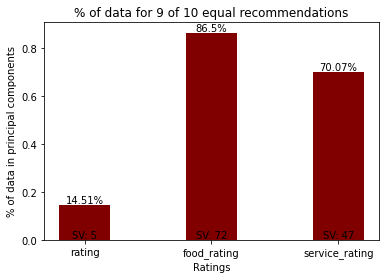

In [ ]:
plt.bar(ranking_list, percentage_list, color ='maroon', width = 0.4)

for i in range(len(sv_list)):
    plt.annotate('SV: ' + str(sv_list[i]), xy=(i,0), ha='center', va='bottom')
    plt.annotate(str((percentage_list[i]*100).round(2))+'%', xy=(i,percentage_list[i]), ha='center', va='bottom')

plt.xlabel("Ratings")
plt.ylabel("% of data in principal components")
plt.title("% of data for 9 of 10 equal recommendations")
plt.show()

Obtuvimos tres modelos diferentes. El primero para 'rating', segundo para 'food_rating', y tercero para 'service_rating'. De ahí se buscó obtener las 10 principales recomendaciones de acuerdo a quienes le dieran un rating bueno al restaurante de 'subway'. Inicialmente incluyendo todos los valores singulares, y después reduciéndolos hasta conseguir un equivalente de 9 de los 10 originales de las recomendaciones. 

* Para 'rating', se consiguieron 9 de las 10 recomendaciones con 5 valores singulares. Los cuales abarcan un 14.51% de todos los datos.
* Para 'food_rating', se consiguieron 9 de las 10 recomendaciones con 72 valores singulares. aquí se tuvo que abarcar 86.5% de todos los datos para obtener las recomendaciones.
* Para 'service_rating', se consiguieron 9 de las 10 recomendaciones con 47 valores singulares. Los cuales abarcan 70.07% de los datos. 

Para el primer modelo fue valido reducir la dimensionalidad de los datos en gran medida, ya que se logró la equivalencia de 9/10 con únicamente el 14.51% de los datos. Sin embargo, para los otros, se tuvo que abarcar mucho más. Pero ese es un caso específico. Bien podría ser diferente para otro valor diferente a 'subway'. 

El método de SVD para reducir dimensionalidad se debe utilizar con buen criterio. Hay que verificar cuanta información se está perdiendo al decidir con cuantos valores singulares nos quedamos, para poder así tomar la decisión de con cuantos se trabajara el modelo.

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**